In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('properties_cleaned - GitHub.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3803, 23)

In [3]:
new_df = df.drop_duplicates()

In [4]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [6]:
new_df.shape

(3677, 23)

In [21]:
new_df['property_type'].value_counts().shape

(2,)

In [22]:
new_df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
rk tower                                  1
rail vihar cghs                           1
meditech apartment                        1
ansal maple crescent                      1
the castle society                        1
Name: count, Length: 676, dtype: int64

In [23]:
new_df[new_df['society'] != 'independent']['society'].value_counts(normalize = True).cumsum().head()

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
Name: proportion, dtype: float64

<Axes: xlabel='society'>

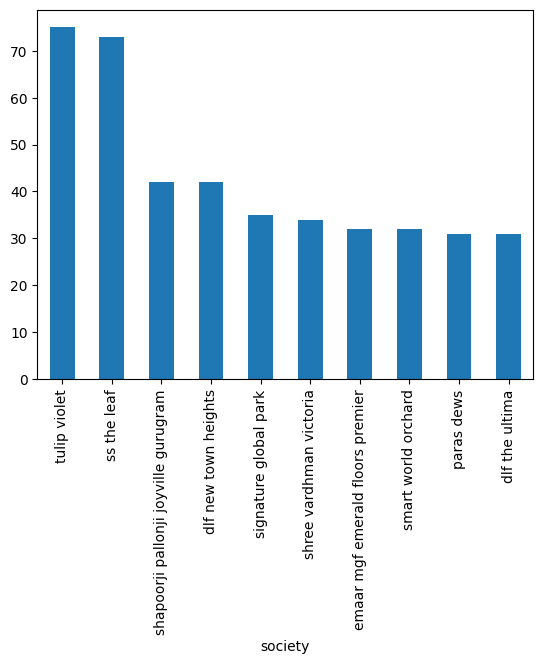

In [24]:
new_df[new_df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar')
#top 10 society

In [25]:
new_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38


In [26]:
new_df['sector'].value_counts()

sector
sohna road    166
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 30       5
sector 80       5
sector 73       3
sector 88       3
sector 27       3
Name: count, Length: 104, dtype: int64

<Axes: xlabel='sector'>

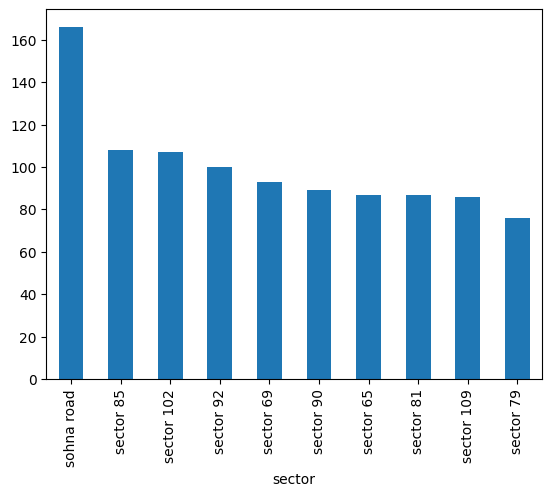

In [27]:
new_df['sector'].value_counts().head(10).plot(kind = 'bar')

In [28]:
new_df['price'].isna().sum()

np.int64(17)

In [29]:
new_df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

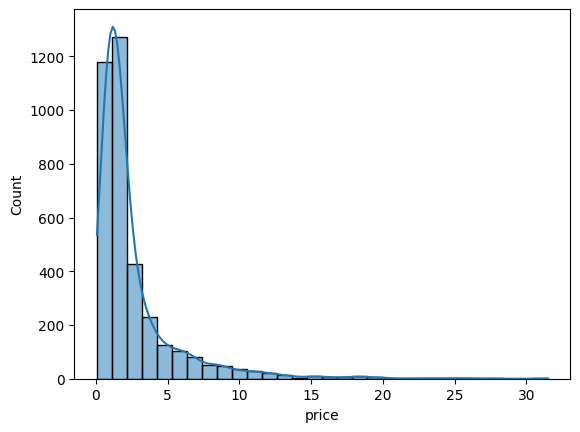

In [30]:
sns.histplot(new_df['price'],kde= True,bins=30)

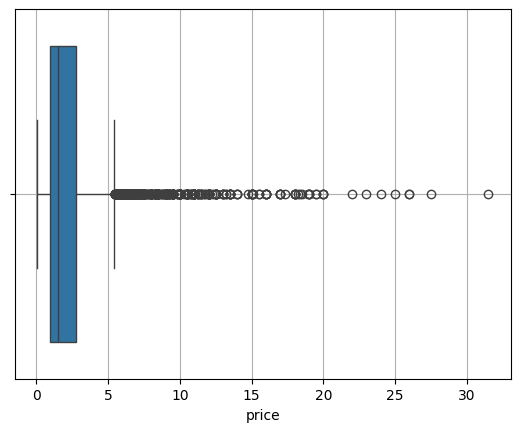

In [31]:
sns.boxplot(x=new_df['price'])
plt.grid()

In [36]:
print(new_df['price'].skew())
print(new_df['price'].kurtosis())

3.2791704733134623
14.933372629214258


In [42]:
quantile = new_df['price'].quantile([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])
print(quantile)

0.01     0.250
0.05     0.370
0.10     0.500
0.20     0.840
0.30     1.070
0.40     1.300
0.50     1.520
0.60     1.820
0.70     2.350
0.80     3.400
0.90     5.910
0.95     8.500
0.99    15.264
Name: price, dtype: float64


In [44]:
q1 = new_df['price'].describe()['25%']
q3 = new_df['price'].describe()['75%']
iqr = q3 - q1
print(iqr)

1.8


In [45]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower)
print(upper)

-1.7500000000000002
5.45


In [48]:
outliers = new_df[(new_df['price']>upper) | (new_df['price']<lower)]
outliers.shape

(425, 23)

In [50]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

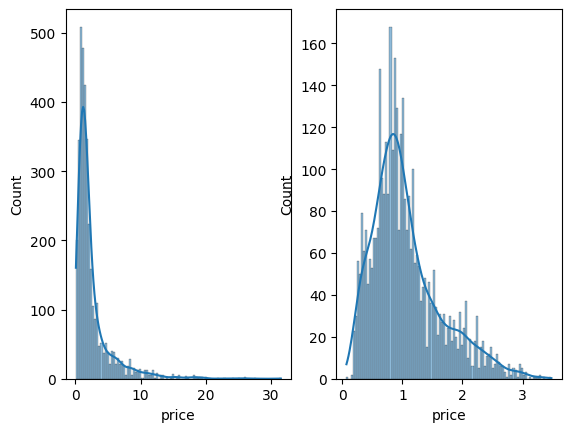

In [67]:
plt.subplot(1,2,1)
sns.histplot(new_df['price'],kde = True,bins = 100)
plt.subplot(1,2,2)
sns.histplot(np.log1p(new_df['price']),kde = True,bins = 100)#use log1p because making no negative observation 

<Axes: ylabel='price'>

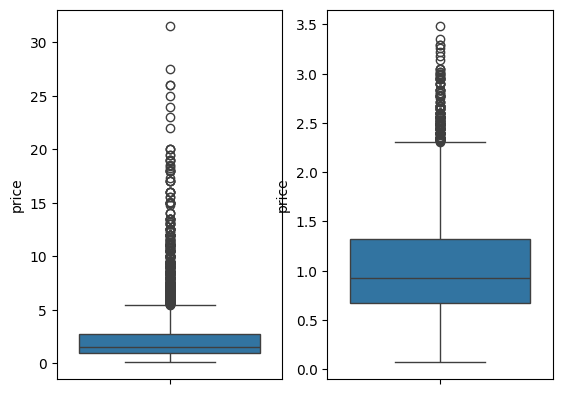

In [68]:
plt.subplot(1,2,1)
sns.boxplot(new_df['price'])
plt.subplot(1,2,2)
sns.boxplot(np.log1p(new_df['price']))

In [62]:
new_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38


In [69]:
new_df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [70]:
new_df['price_per_sqft'].isna().sum()

np.int64(17)

<Axes: xlabel='price', ylabel='Count'>

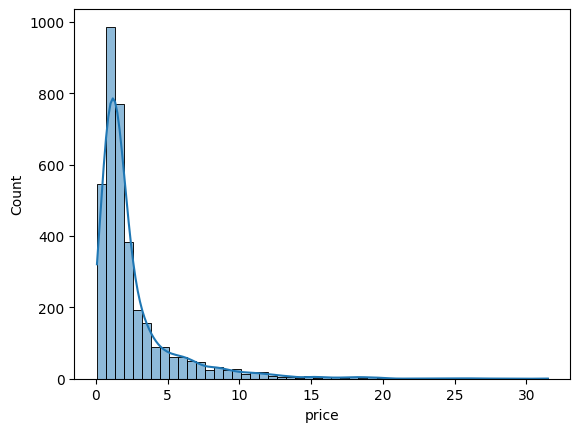

In [71]:
sns.histplot(new_df['price'],kde = True,bins = 50)

<Axes: ylabel='price_per_sqft'>

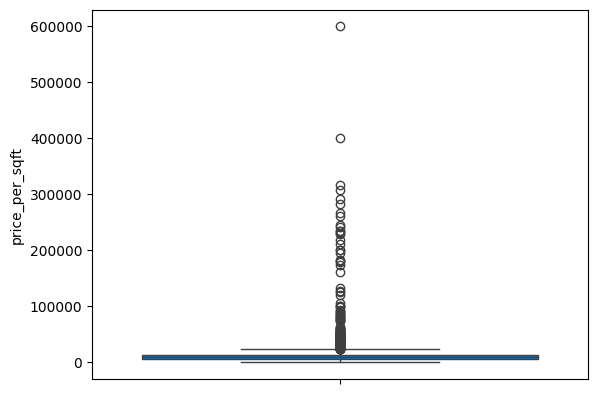

In [72]:
sns.boxplot(new_df['price_per_sqft'])

In [75]:
Q1 = new_df['price_per_sqft'].describe()['25%']
Q2 = new_df['price_per_sqft'].describe()['75%']
IQR = Q2 - Q1
u = Q2 + 1.5*IQR
l = Q1 - 1.5*IQR
print(IQR)
print(u)
print(l)

7063.25
24475.375
-3777.625


In [79]:
price_per_sqft_outliers = new_df[(new_df['price_per_sqft'] > u ) | (new_df['price_per_sqft']<l)]
price_per_sqft_outliers.shape

(354, 23)

In [82]:
new_df['bedRoom'].isna().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

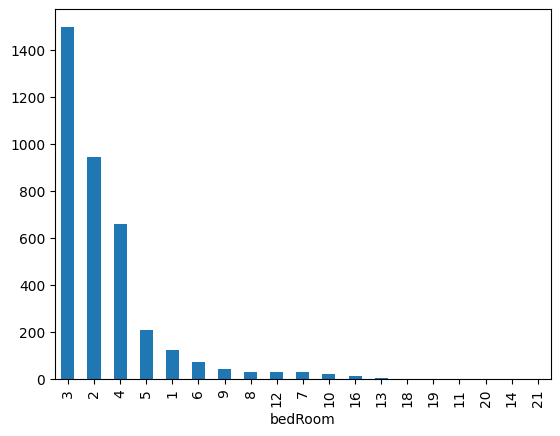

In [83]:
new_df['bedRoom'].value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

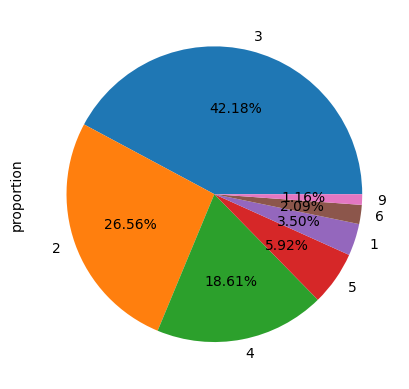

In [86]:
new_df['bedRoom'].value_counts(normalize = True).head(7).plot(kind = 'pie',autopct = '%0.2f%%')

In [88]:
new_df['bathroom'].isna().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

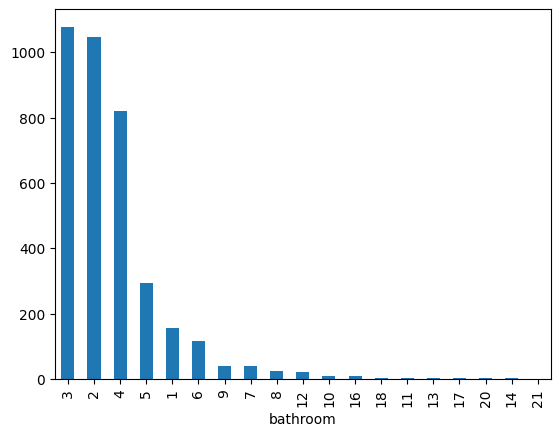

In [90]:
new_df['bathroom'].value_counts().plot(kind ='bar' )

<Axes: ylabel='proportion'>

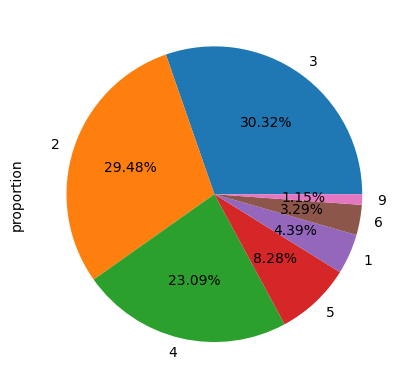

In [91]:
new_df['bathroom'].value_counts(normalize = True).head(7).plot(kind = 'pie',autopct = '%0.2f%%')

In [93]:
new_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38


In [94]:
new_df['balcony'].isnull().sum()

np.int64(0)

<Axes: xlabel='balcony'>

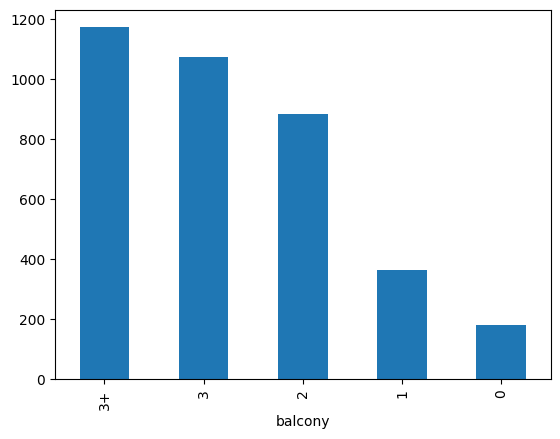

In [95]:
new_df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

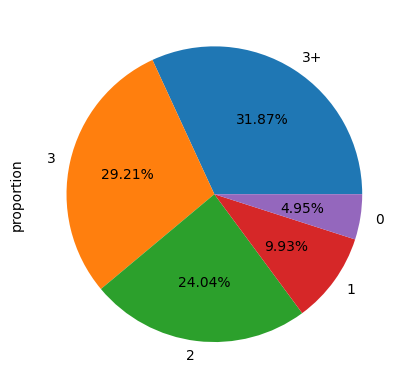

In [96]:
new_df['balcony'].value_counts(normalize = True).head(7).plot(kind = 'pie',autopct = '%0.2f%%')

In [99]:
new_df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [101]:
new_df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

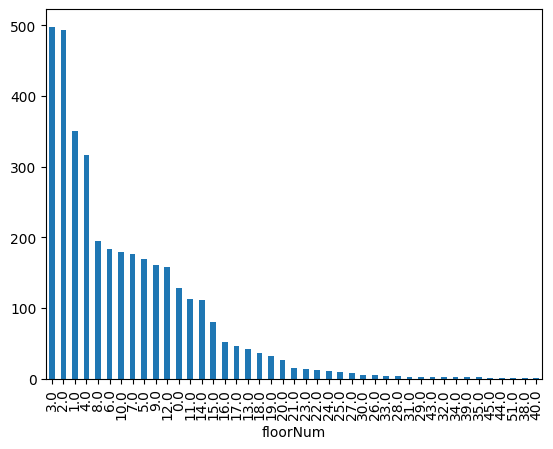

In [102]:
new_df['floorNum'].value_counts().plot(kind='bar')

In [103]:
new_df['facing'].isna().sum()

np.int64(1045)

In [104]:
new_df['facing'].fillna('NA',inplace=True)

C:\Users\debas\AppData\Local\Temp\ipykernel_17696\2275098739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['facing'].fillna('NA',inplace=True)
C:\Users\debas\AppData\Local\Temp\ipykernel_17696\2275098739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['facing'].fillna('NA',inplace=True)


In [105]:
df['facing'].value_counts()

facing
East          642
North-East    639
North         398
West          255
South         233
North-West    200
South-East    174
South-West    157
Name: count, dtype: int64

In [106]:
new_df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NA,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NA,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NA,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NA,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [109]:
new_df['agePossession'].isna().sum()

np.int64(0)

<Axes: xlabel='agePossession'>

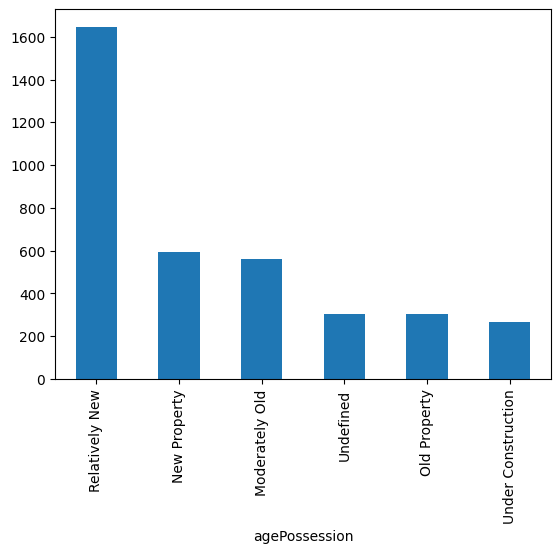

In [111]:
new_df['agePossession'].value_counts().plot(kind = 'bar')

In [112]:
new_df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

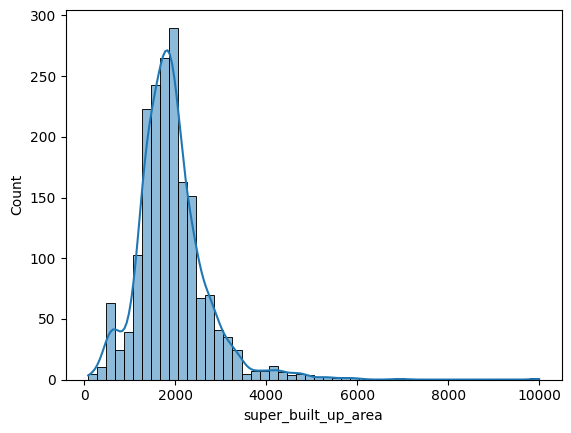

In [118]:
sns.histplot(new_df['super_built_up_area'],kde = True,bins = 50)

<Axes: ylabel='super_built_up_area'>

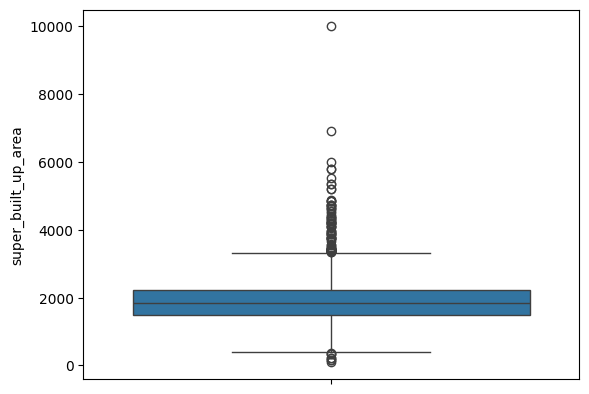

In [117]:
sns.boxplot(new_df['super_built_up_area'].dropna())

<Axes: xlabel='built_up_area', ylabel='Count'>

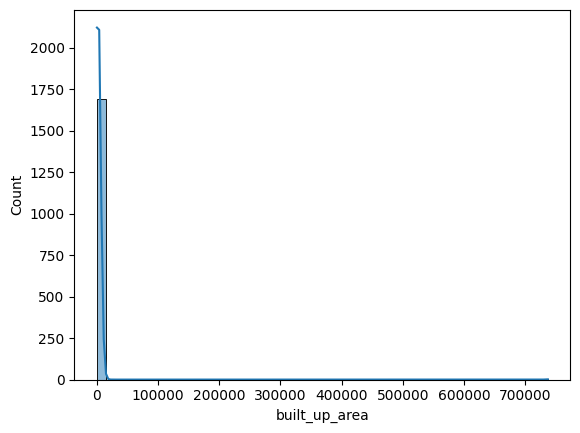

In [119]:
sns.histplot(new_df['built_up_area'],kde = True,bins = 50)

<Axes: xlabel='carpet_area', ylabel='Count'>

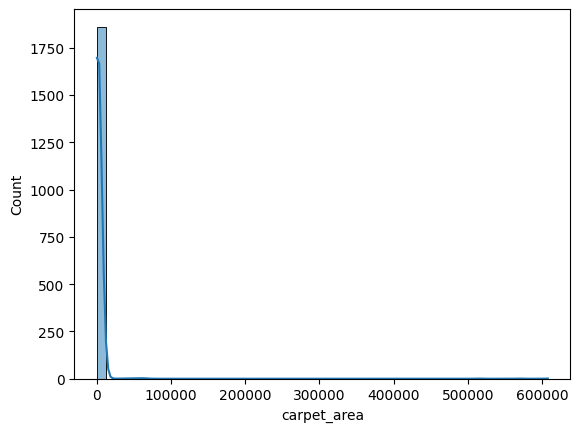

In [120]:
sns.histplot(new_df['carpet_area'],kde = True,bins = 50)

<Axes: ylabel='built_up_area'>

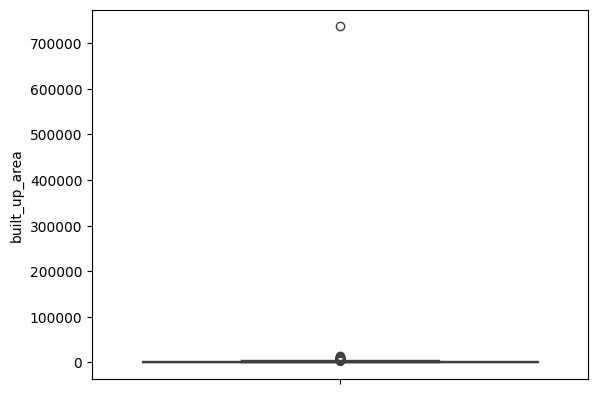

In [121]:
sns.boxplot(new_df['built_up_area'].dropna())

<Axes: ylabel='carpet_area'>

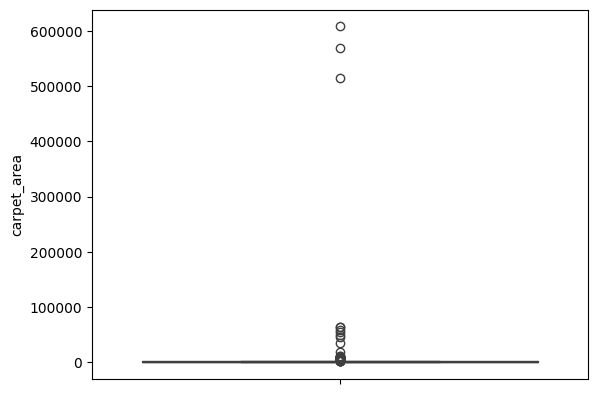

In [122]:
sns.boxplot(new_df['carpet_area'].dropna())

<Axes: ylabel='count'>

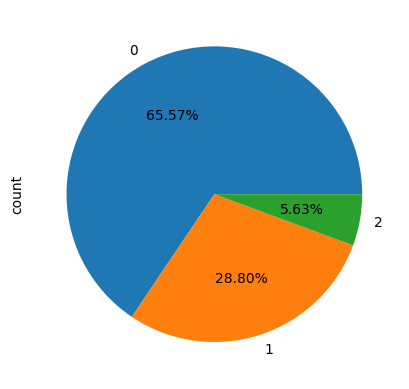

In [124]:
new_df['furnishing_type'].value_counts().plot(kind='pie',autopct = '%0.2f%%')

In [125]:
new_df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

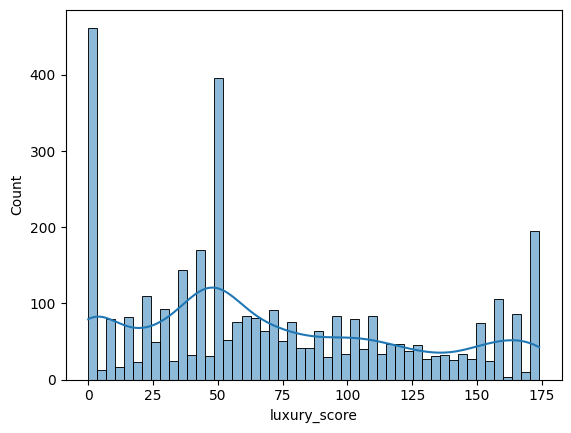

In [127]:
sns.histplot(new_df['luxury_score'],kde = True,bins = 50)